Kolom asli:
 Index(['Entity', 'Year',
       'Absolute deaths from ambient PM2.5 air pollution- State of Global Air'],
      dtype='object') 

Kolom target: Absolute deaths from ambient PM2.5 air pollution- State of Global Air 

Kolom setelah rename:
 Index(['Country', 'Year', 'Deaths_PM2_5'], dtype='object') 

Statistik deskriptif:
 count    1.044000e+03
mean     2.189042e+04
std      1.052487e+05
min      1.000000e+02
25%      1.100000e+03
50%      4.050000e+03
75%      1.010000e+04
max      1.140100e+06
Name: Deaths_PM2_5, dtype: float64 



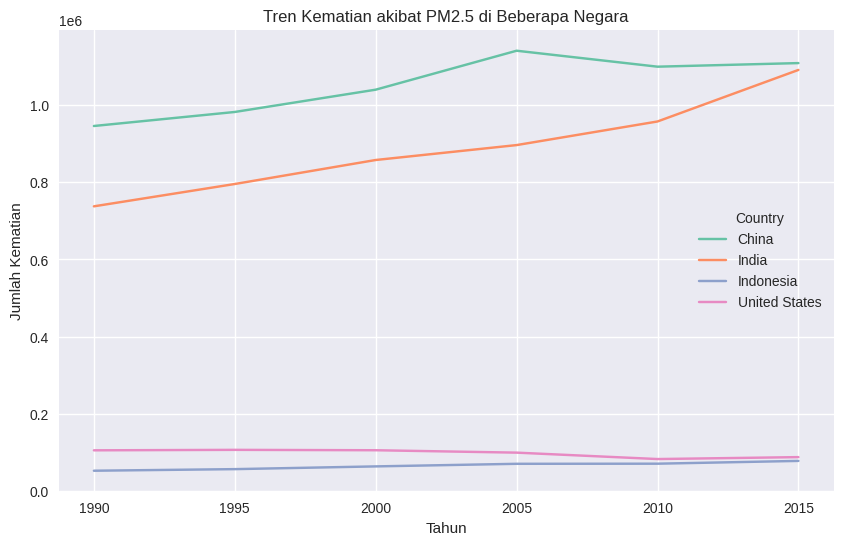

/tmp/ipython-input-1337320905.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_countries, x="Deaths_PM2_5", y="Country", palette="Reds_r")


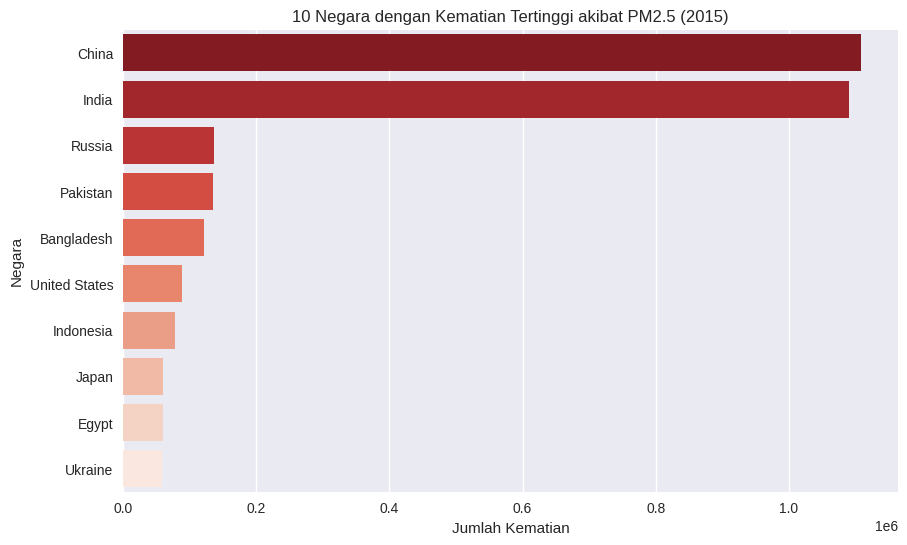

In [9]:
# === 1. Import Library ===
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# === 2. Load Dataset ===
url = "https://raw.githubusercontent.com/owid/owid-datasets/master/datasets/Absolute%20deaths%20from%20ambient%20PM2.5%20air%20pollution-%20State%20of%20Global%20Air/Absolute%20deaths%20from%20ambient%20PM2.5%20air%20pollution-%20State%20of%20Global%20Air.csv"
data = pd.read_csv(url)

# === 3. Cek nama kolom ===
print("Kolom asli:\n", data.columns, "\n")

# Cari otomatis kolom yang mengandung kata 'deaths'
death_col = [c for c in data.columns if "death" in c.lower()][0]
print("Kolom target:", death_col, "\n")

# === 4. Rename agar lebih simple ===
data = data.rename(columns={
    "Entity": "Country",
    "Year": "Year",
    death_col: "Deaths_PM2_5"
})

print("Kolom setelah rename:\n", data.columns, "\n")

# === 5. Statistik deskriptif ===
print("Statistik deskriptif:\n", data["Deaths_PM2_5"].describe(), "\n")

# === 6. Visualisasi tren beberapa negara ===
plt.figure(figsize=(10,6))
sns.lineplot(
    data=data[data["Country"].isin(["Indonesia", "United States", "China", "India"])],
    x="Year", y="Deaths_PM2_5", hue="Country"
)
plt.title("Tren Kematian akibat PM2.5 di Beberapa Negara")
plt.ylabel("Jumlah Kematian")
plt.xlabel("Tahun")
plt.show()

# === 7. Negara dengan kematian tertinggi di tahun terakhir ===
latest_year = data["Year"].max()
top_countries = data[data["Year"] == latest_year].sort_values(by="Deaths_PM2_5", ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(data=top_countries, x="Deaths_PM2_5", y="Country", palette="Reds_r")
plt.title(f"10 Negara dengan Kematian Tertinggi akibat PM2.5 ({latest_year})")
plt.xlabel("Jumlah Kematian")
plt.ylabel("Negara")
plt.show()
